# scikit-learnでクラスタ分析（K-means法）

## クラスタ分析（教師なし学習）

ラベル付けがされていないデータに対して、近しい属性を持つデータをグループ化する手法。

クラスタ分析には大きく２種類あり、  
* 非階層的クラスタ分析（K-Means）  
  * 決められたクラスタ数にしたがって、近い属性のデータをグループ化する
  * サンプル数が大きいビッグデータを分析するときに適している
  * いくつかのクラスターに分けるかは、分析者が決める必要があり、最適クラスター数を自動的に計算する方法は確立されていない。


* 階層的クラスタリング（Ward）
  * クラスタリングの結果を木構造で出力する特徴がある。縦方向の長さは類似度を示し、長いほど類似度が低く、短いほど類似度が高い。
  
## K-Means法


1. 初期値となる重心点をサンプルデータ（データセット全体からランダムに集めた少量のデータ）から決定
2. 各サンプルから最も近い距離にある重心点を計算によって求め、クラスタを構成
3. 2.で求めたクラスタごとに重心を求め、2.を再実行する。2.〜3. を決められた回数繰り返し実行し、大きな変化がなくなるまで計算  

K-Means法デモツール：https://www.albert2005.co.jp/knowledge/data_mining/cluster/non-hierarchical_clustering



## scikit-learnを用いたクラスタ分析

カッコ内はデフォルト値  
sklearn.cluster.KMeans(n_clusters=8, init='k-means++',n_init=10, max_iter=300, tol=0.0001,precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1)

卸売業者の顧客データ

|カラム名|内容|
|:--|--:|
|Channel	|販売チャネル。1: Horeca (ホテル・レストラン・カフェ), 2: 個人向け小売|
|Region	|各顧客の地域。1: リスボン市, 2: ポルト市, 3: その他|
|Fresh|	生鮮品の年間注文額|
|Milk|	生鮮品の年間注文額|
|Grocery|	食料雑貨の年間注文額|
|Frozen|	冷凍食品の年間注文額|
|Detergents_Paper|	衛生用品と紙類の年間注文額|
|Delicassen|	惣菜の年間注文額|

440件の顧客購買傾向に基づいて、4つのクラスタに分類する

In [31]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

cust_df = pd.read_csv("http://pythondatascience.plavox.info/wp-content/uploads/2016/05/Wholesale_customers_data.csv")

cust_df.shape

(440, 8)

In [32]:
# 不要なカラムを削除
del([cust_df['Channel']])
del([cust_df['Region']])
cust_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [33]:
# PandasのデータフレームからNumpyの行列（Array)に変換
cust_array = np.array([
                          cust_df['Fresh'].tolist(),
                          cust_df['Milk'].tolist(),
                          cust_df['Grocery'].tolist(),
                          cust_df['Frozen'].tolist(),
                          cust_df['Detergents_Paper'].tolist(),
                          cust_df['Delicassen'].tolist()
                          ], np.int32
                        )
cust_array

array([[12669,  7057,  6353, ..., 14531, 10290,  2787],
       [ 9656,  9810,  8808, ..., 15488,  1981,  1698],
       [ 7561,  9568,  7684, ..., 30243,  2232,  2510],
       [  214,  1762,  2405, ...,   437,  1038,    65],
       [ 2674,  3293,  3516, ..., 14841,   168,   477],
       [ 1338,  1776,  7844, ...,  1867,  2125,    52]], dtype=int32)

In [34]:
# 行列を転置
cust_array = cust_array.T
cust_array

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]], dtype=int32)

In [35]:
# クラスタ分析を実行（クラスタ数＝４）
pred = KMeans(n_clusters=4).fit_predict(cust_array)
pred

array([0, 2, 0, 0, 3, 0, 0, 0, 0, 2, 2, 0, 3, 2, 3, 0, 2, 0, 0, 0, 0, 0,
       3, 1, 3, 0, 0, 0, 2, 3, 0, 0, 0, 3, 0, 2, 3, 2, 2, 3, 3, 0, 2, 2,
       0, 2, 2, 1, 0, 2, 0, 0, 3, 2, 3, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 3,
       0, 3, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 3, 0, 0, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       3, 0, 0, 0, 0, 3, 2, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 3, 2,
       0, 0, 2, 2, 3, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,

上記のように、440件の各顧客にクラスタ番号(0, 1, 2, 3)が付与されたことを表す

## 各クラスタの特徴を確認

In [36]:
cust_df['cluster_id']=pred
cust_df.head(20)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_id
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,3
5,9413,8259,5126,666,1795,1451,0
6,12126,3199,6975,480,3140,545,0
7,7579,4956,9426,1669,3321,2566,0
8,5963,3648,6192,425,1716,750,0
9,6006,11093,18881,1159,7425,2098,2


In [37]:
cust_df['cluster_id'].value_counts()

0    276
2     95
3     58
1     11
Name: cluster_id, dtype: int64

In [38]:
# 各クラスタの各部門商品の購買額の平均値
print(cust_df[cust_df['cluster_id'] == 0].mean())

print(cust_df[cust_df['cluster_id'] == 1].mean())

print(cust_df[cust_df['cluster_id'] == 2].mean())

print(cust_df[cust_df['cluster_id'] == 3].mean())

Fresh               9087.463768
Milk                3027.427536
Grocery             3753.514493
Frozen              2817.985507
Detergents_Paper    1003.003623
Delicassen          1040.525362
cluster_id             0.000000
dtype: float64
Fresh               19888.272727
Milk                36142.363636
Grocery             45517.454545
Frozen               6328.909091
Detergents_Paper    21417.090909
Delicassen           8414.000000
cluster_id              1.000000
dtype: float64
Fresh                4808.842105
Milk                10525.010526
Grocery             16909.789474
Frozen               1462.589474
Detergents_Paper     7302.400000
Delicassen           1650.884211
cluster_id              2.000000
dtype: float64
Fresh               36144.482759
Milk                 5471.465517
Grocery              6128.793103
Frozen               6298.655172
Detergents_Paper     1064.000000
Delicassen           2316.724138
cluster_id              3.000000
dtype: float64


### 各クラスタの各部門商品の購買額の平均値を可視化

[Text(0, 0, 'cluster0'),
 Text(0, 0, 'cluster1'),
 Text(0, 0, 'cluster2'),
 Text(0, 0, 'cluster3')]

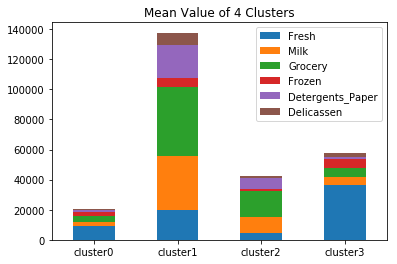

In [40]:
# 可視化（積み上げ棒グラフ）
import matplotlib.pyplot as plt

clusterinfo = pd.DataFrame()
for i in range(4):
  clusterinfo['cluster' + str(i)] = cust_df[cust_df['cluster_id']  == i].mean()
clusterinfo = clusterinfo.drop('cluster_id')
 
my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="Mean Value of 4 Clusters")
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)

クラスタ番号=2に分類された顧客は全体的に購買額が高い傾向があり、クラスタ番号=3に分類された顧客は低い傾向がある。
